<a href="https://colab.research.google.com/github/swathimahadevan/project4-customer-automation/blob/main/Real-Time%20Speech-to-Text%20System%20for%20Customer%20Support%20Automation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install SpeechRecognition pydub pandas matplotlib seaborn nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 17.0 MB/s eta 0:00:00


In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
!pip install nltk
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



=== Transcription ===
I'm on my way to the meeting
=== Analysis Summary ===
Total Words (filtered): 2
Total Sentences: 1
Average Word Length: 5.00
Average Sentence Length (in words): 8.00


<ipython-input-5-a914d8f5ffd9>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='viridis')


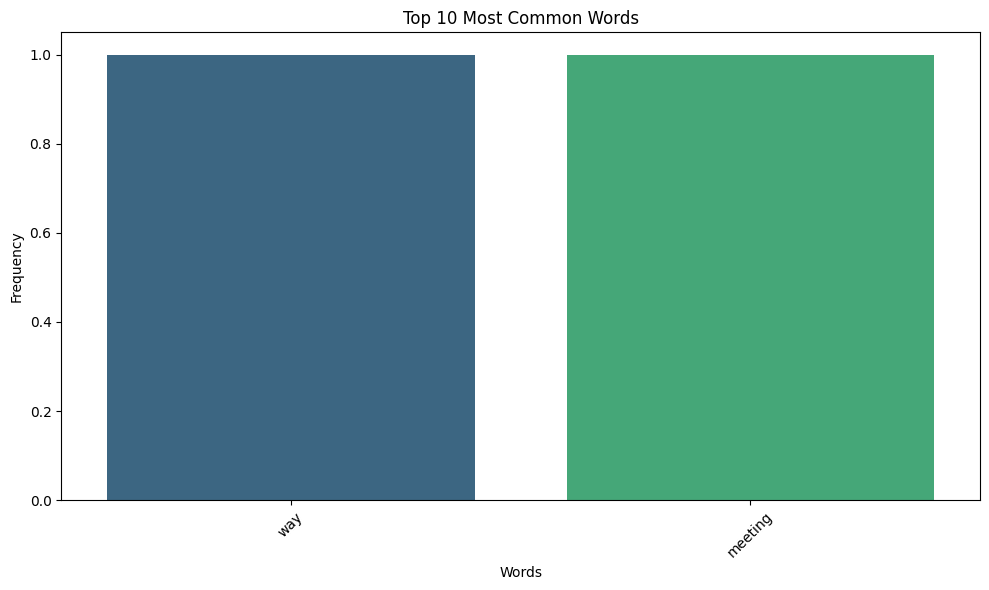

In [5]:
import os
import speech_recognition as sr
from pydub import AudioSegment
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from collections import Counter
import nltk

# Download NLTK resources (run once)
nltk.download('punkt')
nltk.download('stopwords')

# === STEP 1: Convert audio to WAV ===
def convert_to_wav(audio_path):
    if not audio_path.endswith('.wav'):
        audio = AudioSegment.from_file(audio_path)
        wav_path = os.path.splitext(audio_path)[0] + '.wav'
        audio.export(wav_path, format='wav')
        return wav_path
    return audio_path

# === STEP 2: Transcribe audio ===
def transcribe_audio(audio_path):
    recognizer = sr.Recognizer()
    with sr.AudioFile(audio_path) as source:
        audio = recognizer.record(source)
    try:
        text = recognizer.recognize_google(audio)
        return text
    except sr.UnknownValueError:
        return "[Unintelligible]"
    except sr.RequestError:
        return "[API unavailable]"

# === STEP 3: EDA and Word Count Analysis ===
def analyze_transcription(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    sentences = sent_tokenize(text)
    filtered_words = [w.lower() for w in words if w.isalpha() and w.lower() not in stop_words]

    word_count = len(filtered_words)
    sent_count = len(sentences)
    avg_word_len = sum(len(word) for word in filtered_words) / word_count if word_count > 0 else 0
    avg_sent_len = len(words) / sent_count if sent_count > 0 else 0

    # Display metrics
    print("=== Analysis Summary ===")
    print(f"Total Words (filtered): {word_count}")
    print(f"Total Sentences: {sent_count}")
    print(f"Average Word Length: {avg_word_len:.2f}")
    print(f"Average Sentence Length (in words): {avg_sent_len:.2f}")

    return filtered_words

# === STEP 4: Visualization ===
def visualize_word_freq(filtered_words):
    word_freq = Counter(filtered_words)
    common_words = word_freq.most_common(10)
    words, counts = zip(*common_words)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(words), y=list(counts), palette='viridis')
    plt.title("Top 10 Most Common Words")
    plt.ylabel("Frequency")
    plt.xlabel("Words")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# === MAIN ===
if __name__ == "__main__":
    audio_file = "/content/1001_IOM_NEU_XX.wav"  # Replace with your actual file
    wav_file = convert_to_wav(audio_file)
    transcription = transcribe_audio(wav_file)

    print("\n=== Transcription ===")
    print(transcription)

    filtered_words = analyze_transcription(transcription)
    visualize_word_freq(filtered_words)